<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла.

In [13]:
try:  from google.colab import drive
except ModuleNotFoundError:
  !pip install --upgrade google-colab
  from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
hh = pd.read_csv('/content/gdrive/MyDrive/PY/1/dst-3.0_16_1_hh_database.csv', sep = ";", on_bad_lines='warn')       # 44 секунды
hhe = pd.read_csv('/content/gdrive/MyDrive/PY/ExchangeRates.csv', sep = ",", on_bad_lines='warn')
# hh = pd.read_csv('https://theants.ru/dst_3_0_16_1_hh_database.csv', sep = ";", on_bad_lines='warn')            # - 3:42
import pandas as pd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [14]:
# Вывожу несколько первых строк таблицы, чтобы убедиться в том, что ваши данные не повреждены.
display(hh.head(3))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [6]:
# вывожу информацию о числе непустых значений в столбцах и их типах в таблице.
hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

In [7]:
# Задание 2.5
# Сколько уникальных значений содержится в столбце «Опыт работы»?
hh['Опыт работы'].nunique()

44413

4. Обратите внимание на информацию о числе непустых значений.

In [8]:
# Вывожу информацию о числе непустых значений и пустых для наглядности
non_nan = hh.shape[0] - hh.isna().sum()
missing = non_nan[non_nan != hh.shape[0]]
pd.DataFrame({'Колонки с пропущенными значениями': missing.index, 'Не пустые': missing.values, 'Пустые': hh.shape[0]-missing.values, 'Итого:': hh.shape[0]})

,Колонки с пропущенными значениями,Не пустые,Пустые,Итого:
0,Опыт работы,44576,168,44744
1,Последнее/нынешнее место работы,44743,1,44744
2,Последняя/нынешняя должность,44742,2,44744


5. Выведите основную статистическую информацию о столбцах.


In [9]:
#Вывожу основную статистическую информацию о столбцах.
hh.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


In [10]:
# Задание 2.1
# Чему равна размерность таблицы? Введите её в виде кортежа (число строк, число столбцов).
hh.shape

(44744, 12)

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [16]:
# Создаю с помощью функции-преобразования новый признак "Образование", который должен иметь 4 категории: "Высшее", "Неоконченное высшее", "Среднее специальное" и "Среднее".
# т.к. искомое гарантировано присутствует в начале строки, то ограничим поиск максимальной длиной 19 символов (Неоконченное высшее)
hh["Образование"] = hh["Образование и ВУЗ"].apply(lambda x: next(word for word in ["Высшее", "Неоконченное высшее", "Среднее специальное", "Среднее образование"] if word in x[:19]), None)

# Проверка полученных категории, с помощью метода unique()
display(list(hh["Образование"].unique()))

# Ответ на контрольный вопрос задания - Сколько соискателей имеет средний уровень образования (школьное образование)?
display(hh[hh["Образование"] == 'Среднее образование']["Образование"].value_counts())


# Удаляю столбец "Образование и ВУЗ"
hh = hh.drop(['Образование и ВУЗ'], axis=1)

<ipython-input-16-c41b2486d36d>:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  hh["Образование"] = hh["Образование и ВУЗ"].apply(lambda x: next(word for word in ["Высшее", "Неоконченное высшее", "Среднее специальное", "Среднее образование"] if word in x[:19]), None)


['Неоконченное высшее', 'Высшее', 'Среднее специальное', 'Среднее образование']

,count
Образование,
Среднее образование,559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина.
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '.
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [17]:
# Создаю с помощью функции-преобразования новый признак ['Sex'] срез первой буквы из ['Пол, возраст']
hh['Sex'] = hh.apply(lambda r: r['Пол, возраст'][0], axis=1)
# Создаю с помощью функции-преобразования новый признак ['Age'] из среза ['Пол, возраст']
hh['Age'] = hh.apply(lambda r: int(r['Пол, возраст'].split(',')[1][2:4]), axis=1).astype('Int16')
# Удаляю столбец 'Пол, возраст'
hh = hh.drop(['Пол, возраст'], axis =1)

hh.head(3)

# hh['Sex'], hh['Age'] = zip(*hh.apply(lambda r: (r['Пол, возраст'][0], int(r['Пол, возраст'].split(',')[1][2:4])), axis=1))

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Sex,Age
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36


In [18]:
#Ответы на контрольные вопросы

display('Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых', (hh["Sex"].value_counts(normalize=True) * 100).round(2)['Ж'])

display('Чему равен средний возраст соискателей? Ответ округлите до десятых', hh.Age.mean().round(1))

'Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых'

19.07

'Чему равен средний возраст соискателей? Ответ округлите до десятых'

32.2

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**.

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [19]:
# Определяем функцию y2m для преобразования строки с опытом работы в месяцы
def y2m(i):
    # Проверка, является ли входное значение строкой и длина строки больше 11 символов (если стоит "Не указано")
    if not isinstance(i, str) or len(i) <= 11:
        return None  # Если условия не выполнены, возвращаем None

    # Разбиваем строку по пробелу
    i = i.split(' ')

    # Проверяем первый символ четвертого элемента для определения вида опыта (лет или месяцев)
    if i[3][0] in {'л', 'г'}:
        # Если опыт указан в годах ('лет' или 'год'), преобразуем его в месяцы
        return int(int(i[2]) * 12 + (int(i[4]) if i[4].isdigit() else 0))
    elif i[3][0] == 'м':
        # Если опыт указан в месяцах ('мес'), возвращаем значение как есть
        return int(i[2])
    else:
        return 0  # Если формат не распознан, возвращаем 0

# Применение функции y2m к столбцу 'Опыт работы' и создание на его основе нового столбца 'Опыт работы (месяц)'
hh["Опыт работы (месяц)"] = hh['Опыт работы'].apply(y2m).astype('Int16')

# Удаление старого столбца 'Опыт работы'
hh = hh.drop(['Опыт работы'], axis=1)

# Ответ на Задание 3.3
print('Чему равен медианный опыт работы (в месяцах) в нашей таблице?', hh["Опыт работы (месяц)"].median())

Чему равен медианный опыт работы (в месяцах) в нашей таблице? 100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , …
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [20]:
# Признак "Город" должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".
# Список городов-миллионников:
million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']

#Создаю новый столбец "Город" на основании столбца "Город, переезд, командировки" с помощью лямбда функции - ищу города разделяя по запятым и удаляя лишние пробелы
hh['Город'] = hh["Город, переезд, командировки"].apply(
    lambda x: 'город-миллионник' if x.split(',')[0].replace(' ', '') in million_cities
    else x.split(",")[0].replace(" ", "") if x.split(',')[0].replace(' ', '') in {'Москва', 'Санкт-Петербург'}
    else 'другие')

print(hh['Город'].value_counts())

# Ответы на 3.4
print('Сколько процентов соискателей живут в Санкт-Петербурге c округлением до целого:', int((hh["Город"].value_counts(normalize=True) * 100)['Санкт-Петербург']), '%')

Город
Москва              16621
другие              16452
город-миллионник     6734
Санкт-Петербург      4937
Name: count, dtype: int64
Сколько процентов соискателей живут в Санкт-Петербурге c округлением до целого: 11 %


In [21]:
# Признак "Готовность к переезду" должен иметь два возможных варианта: True или False.

hh['Готовность к переезду'] = ~hh["Город, переезд, командировки"].str.contains('не готов[а]? к п')
hh['Готовность к командировкам'] = ~hh["Город, переезд, командировки"].str.contains('не готов[а]? к к')

# Вывожу результаты
print(hh['Готовность к переезду'].value_counts())
print(hh['Готовность к командировкам'].value_counts())

# Удаляю столбец "Город, переезд, командировки" из таблицы.
hh.drop(["Город, переезд, командировки"], axis=1)

# Ответы на 3.4
print('Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого:', int((hh["Готовность к переезду"] & hh["Готовность к командировкам"]).mean() * 100), '%')

Готовность к переезду
False    28719
True     16025
Name: count, dtype: int64
Готовность к командировкам
True     31716
False    13028
Name: count, dtype: int64
Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого: 32 %


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [22]:
#Создаю новые столбцы с булево
hh['полная занятость'] = hh["Занятость"].str.contains('полная занятость')
hh['частичная занятость'] = hh["Занятость"].str.contains('частичная занятость')
hh['проектная работа'] = hh["Занятость"].str.contains('проектная работа')
hh['стажировка'] = hh["Занятость"].str.contains('стажировка')
hh['волонтерство'] = hh["Занятость"].str.contains('волонтерство')

# Удаляю столбец согласно заданию
hh = hh.drop(["Занятость"], axis=1)

In [23]:
#Создаю новые столбцы с булево
# print(hh['График'].value_counts())

hh['полный день '] = hh["График"].str.contains('полный день')
hh['гибкий график'] = hh["График"].str.contains('гибкий график')
hh['сменный график'] = hh["График"].str.contains('сменный график')
hh['удаленная работа'] = hh["График"].str.contains('удаленная работа')
hh['вахтовый метод'] = hh["График"].str.contains('вахтовый метод')

# Удаляю столбец согласно заданию
hh = hh.drop(["График"], axis=1)

In [24]:
# Ответы на 3.5
print('Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True):', ((hh["проектная работа"] & hh["волонтерство"]).sum()))
print('Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?:', ((hh["вахтовый метод"] & hh["гибкий график"]).sum()))

Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True): 436
Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**.
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата,
* "proportion" - пропорция,
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования:
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [25]:
# Создаю функцию конвертации валют          #10 секунд выполнение кода
def convert_salary(row, exchange_rates):
    # разделяю строку ЗП на число и имя валюты
    salary, currency = row['ЗП'].split()[:2]
    salary = int(salary)
    currency = currency.rstrip('.').upper()

    # Конвертация 'БЕЛ.РУБ' для удобства дальнейшей работы
    if currency == 'БЕЛ.РУБ':
        currency = 'BYN'
    # Если 'РУБ', то оставляем как есть
    if currency == 'РУБ':
        return salary
    else:
        # перевод в формат даты
        date = pd.to_datetime(row['Обновление резюме'], format='%d.%m.%Y %H:%M').date()

        # Попытка найти курс обмена
        exchange_rate_row = exchange_rates.loc[(exchange_rates['date'] == date) & (exchange_rates['currency'].str.upper() == currency)]
        if not exchange_rate_row.empty:
            return (salary * exchange_rate_row['close'].iloc[0] / exchange_rate_row['proportion'].iloc[0]).round(2)
        else:
            return None

# Преобразование колонки 'date' в формат даты
hhe['date'] = pd.to_datetime(hhe['date'], format='%d/%m/%y').dt.date

# Передача датафрейма hhe в функцию в качестве аргумента, чтобы избежать его постоянного поиска в глобальном пространстве
hh['ЗП (руб)'] = hh.apply(convert_salary, axis=1, exchange_rates=hhe)

# Удаляю столбец ЗП
hh = hh.drop(["ЗП"], axis=1)

In [26]:
# Ответ на Задание 3.6

display('Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)? Ответ приведите в тысячах рублей и округлите до целого:',
int(hh['ЗП (руб)'].median()/1000))

'Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)? Ответ приведите в тысячах рублей и округлите до целого:'

59

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

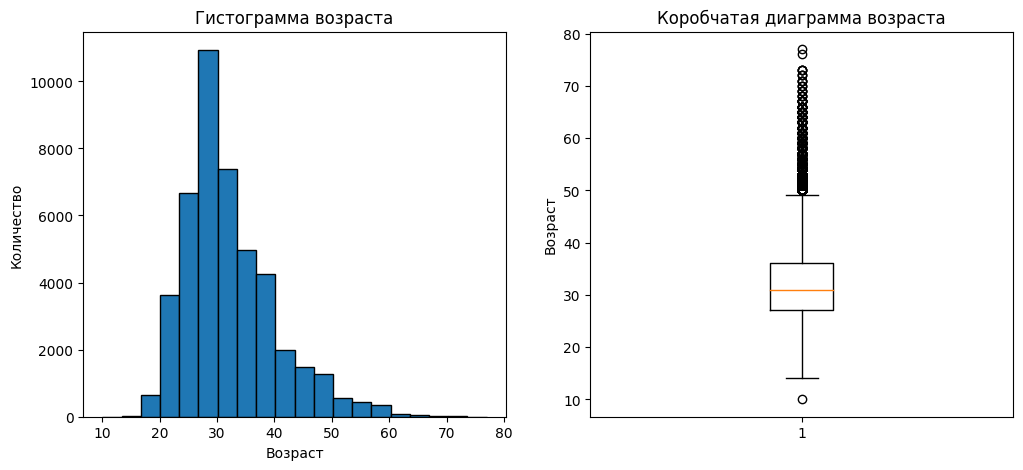

Мода возраста: 30
Минимальный возраст: 10
Максимальный возраст: 77
Возраст большинства соискателей находится в диапазоне: Нижний квартиль (25%) - Верхний квартиль (75%): 27 - 36 лет
Аномалии для признака возраста - минимальный возраст 10 лет. Минимальный возраст для работы - 14 лет (исключение работа в цирке или театре)
Задание 4.2 - Чему равен максимальный опыт работы (в месяцах)? 1188


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Создаем фигуру с двумя подграфиками: гистограмма и коробчатая диаграмма
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Гистограмма распределения возраста
axs[0].hist(hh['Age'].dropna(), bins=20, edgecolor='black')
axs[0].set_title('Гистограмма возраста')
axs[0].set_xlabel('Возраст')
axs[0].set_ylabel('Количество')

# Коробчатая диаграмма для возраста
axs[1].boxplot(hh['Age'].dropna())
axs[1].set_title('Коробчатая диаграмма возраста')
axs[1].set_ylabel('Возраст')

plt.show()

# Выводы
print('Мода возраста:', hh['Age'].mode()[0])
print('Минимальный возраст:', hh['Age'].min())
print('Максимальный возраст:', hh['Age'].max())
print('Возраст большинства соискателей находится в диапазоне: Нижний квартиль (25%) - Верхний квартиль (75%):', int(hh['Age'].describe()['25%']),'-', int(hh['Age'].describe()['75%']), 'лет')
# print(f"Верхний квартиль (75%): {int(hh['Age'].describe()['75%'])}")
print('Аномалии для признака возраста - минимальный возраст', hh['Age'].min(), 'лет.', 'Минимальный возраст для работы - 14 лет (исключение работа в цирке или театре)')

print('Задание 4.2 - Чему равен максимальный опыт работы (в месяцах)?', hh['Опыт работы (месяц)'].max())

*ваши выводы по графику здесь*

*   Мода возраста: 30

*   Минимальный возраст: 10

*   Максимальный возраст: 77

*   Возраст большинства соискателей находится в диапазоне: Нижний квартиль (25%) - Верхний квартиль (75%): 27 - 36 лет


*   Аномалии для признака возраста - минимальный возраст 10 лет. Минимальный возраст для работы - 14 лет (исключение работа в цирке или театре)

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

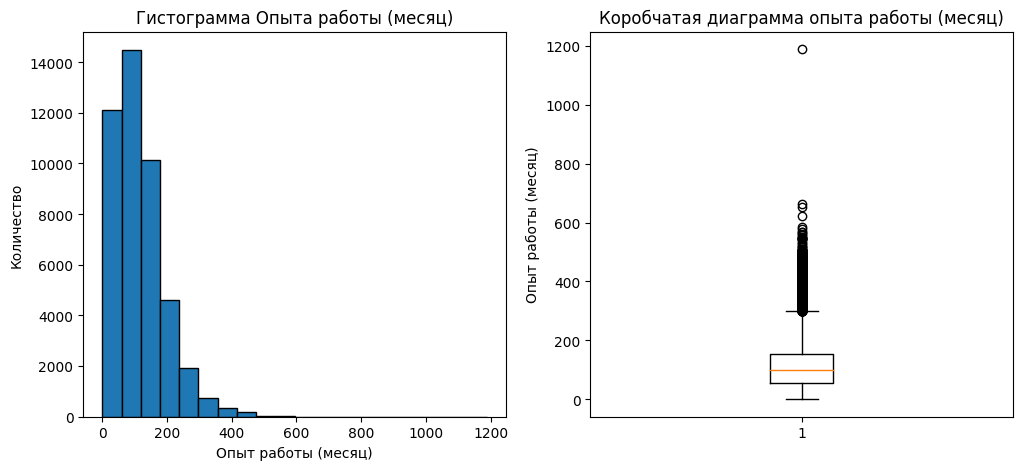

Мода столбца Опыт работы (месяц): 81
Минимальное значение: 1
Максимальное значени: 1188
Опыт работы находится в диапазоне: Нижний квартиль (25%) - Верхний квартиль (75%): 57 - 154 месяцев
Аномалии для признака опыта работы - максимальный опыт работы: 99 лет.


In [28]:
# ваш код здесь
import pandas as pd
import matplotlib.pyplot as plt

# Создаем фигуру с двумя подграфиками: гистограмма и коробчатая диаграмма
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Гистограмма распределения Опыта работы (месяц)
axs[0].hist(hh['Опыт работы (месяц)'].dropna(), bins=20, edgecolor='black')
axs[0].set_title('Гистограмма Опыта работы (месяц)')
axs[0].set_xlabel('Опыт работы (месяц)')
axs[0].set_ylabel('Количество')

# Коробчатая диаграмма для Опыта работы (месяц)
axs[1].boxplot(hh['Опыт работы (месяц)'].dropna())
axs[1].set_title('Коробчатая диаграмма опыта работы (месяц)')
axs[1].set_ylabel('Опыт работы (месяц)')

plt.show()

# Выводы
print('Мода столбца Опыт работы (месяц):', hh['Опыт работы (месяц)'].mode()[0])
print('Минимальное значение:', hh['Опыт работы (месяц)'].min())
print('Максимальное значени:', hh['Опыт работы (месяц)'].max())
print('Опыт работы находится в диапазоне: Нижний квартиль (25%) - Верхний квартиль (75%):', int(hh['Опыт работы (месяц)'].describe()['25%']),'-', int(hh['Опыт работы (месяц)'].describe()['75%']), 'месяцев')
print('Аномалии для признака опыта работы - максимальный опыт работы:', int(hh['Опыт работы (месяц)'].max() / 12), 'лет.')


*ваши выводы здесь*

*  Мода столбца Опыт работы (месяц): 72
*  Минимальное значение: 1
*  Максимальное значени: 1188
*  Опыт работы находится в диапазоне: Нижний квартиль (25%) - Верхний квартиль (75%): 48 - 144 месяцев
*  Аномалии для признака опыта работы - максимальный опыт работы: 99 лет.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


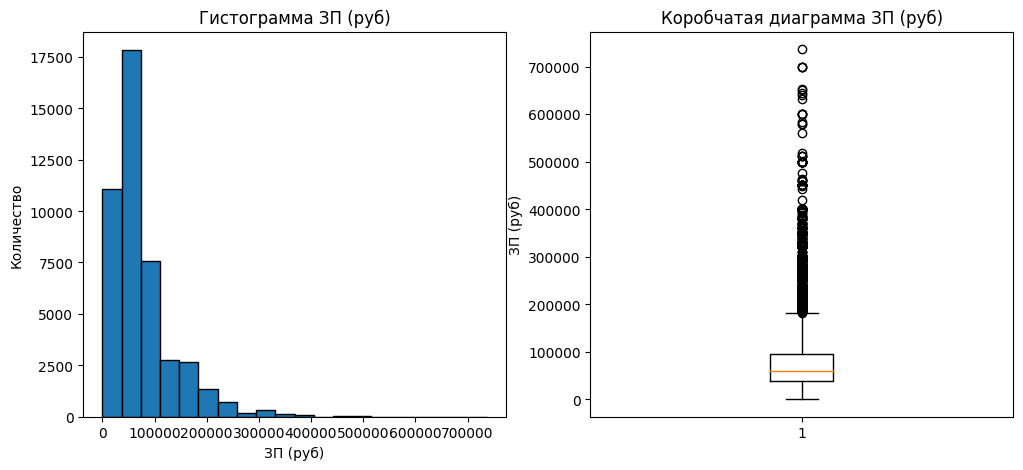

Мода столбца Опыт работы (месяц): 50000.0
Минимальное значение: 1.0
Максимальное значени: 24304876.0
ЗП (руб) находится в диапазоне: Нижний квартиль (25%) - Верхний квартиль (75%): 38000 - 95000 руб
Аномалии для признака ЗП (руб): 
 - Присутствуют максимальные зарплаты, они не дают возможности корректно отобразить графики: [24304876.0, 7675224.0, 3000000.0, 2500000.0, 1750000.0, 1000000.0, 923983.0, 900000.0, 800000.0, 750000.0] руб 
 - Присутствуют аномально низкие зарплаты {1.0, 18.0, 25.0, 26.99, 30.0, 40.0, 45.0, 50.0, 55.0, 59.55, 60.0, 63.98, 64.24, 64.25, 64.68, 65.0, 65.33, 63.96, 70.0, 71.92, 85.0, 90.0, 100.0, 101.0, 110.0, 111.0, 120.0} руб


In [29]:
# ваш код здесь
import pandas as pd
import matplotlib.pyplot as plt

# Создаем фигуру с двумя подграфиками: гистограмма и коробчатая диаграмма
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Гистограмма распределения ЗП (руб) - уберу топ 10, с ними график бесполезен
axs[0].hist((hh['ЗП (руб)'][~hh['ЗП (руб)'].isin(hh['ЗП (руб)'].nlargest(10))].dropna()), bins=20, edgecolor='black')
axs[0].set_title('Гистограмма ЗП (руб)')
axs[0].set_xlabel('ЗП (руб)')
axs[0].set_ylabel('Количество')

# Коробчатая диаграмма для ЗП (руб)
axs[1].boxplot(hh['ЗП (руб)'][~hh['ЗП (руб)'].isin(hh['ЗП (руб)'].nlargest(10))].dropna())
axs[1].set_title('Коробчатая диаграмма ЗП (руб)')
axs[1].set_ylabel('ЗП (руб)')

plt.show()

# Выводы
print('Мода столбца Опыт работы (месяц):', hh['ЗП (руб)'].mode()[0])
print('Минимальное значение:', hh['ЗП (руб)'].min())
print('Максимальное значени:', hh['ЗП (руб)'].max())
print('ЗП (руб) находится в диапазоне: Нижний квартиль (25%) - Верхний квартиль (75%):', int(hh['ЗП (руб)'].describe()['25%']),'-', int(hh['ЗП (руб)'].describe()['75%']), 'руб')
print('Аномалии для признака ЗП (руб): \n - Присутствуют максимальные зарплаты, они не дают возможности корректно отобразить графики:', list(hh['ЗП (руб)'].nlargest(10)), 'руб', '\n - Присутствуют аномально низкие зарплаты',set(hh['ЗП (руб)'].nsmallest(50)), 'руб')


*ваши выводы здесь*

* Мода столбца Опыт работы (месяц): 50000.0
* Минимальное значение: 1.0
* Максимальное значени: 24304876.0
* ЗП (руб) находится в диапазоне: Нижний квартиль (25%) - Верхний квартиль (75%): 38000 - 95000 руб
* Аномалии для признака ЗП (руб):
 - Присутствуют максимальные зарплаты, они не дают возможности корректно отобразить графики: [24304876.0, 7675224.0, 3000000.0, 2500000.0, 1750000.0, 1000000.0, 923983.0, 900000.0, 800000.0, 750000.0] руб
 - Присутствуют аномально низкие зарплаты {1.0, 18.0, 25.0, 26.99, 30.0, 40.0, 45.0, 50.0, 55.0, 59.55, 60.0, 63.98, 64.24, 64.25, 64.68, 65.0, 65.33, 63.96, 70.0, 71.92, 85.0, 90.0, 100.0, 101.0, 110.0, 111.0, 120.0} руб

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

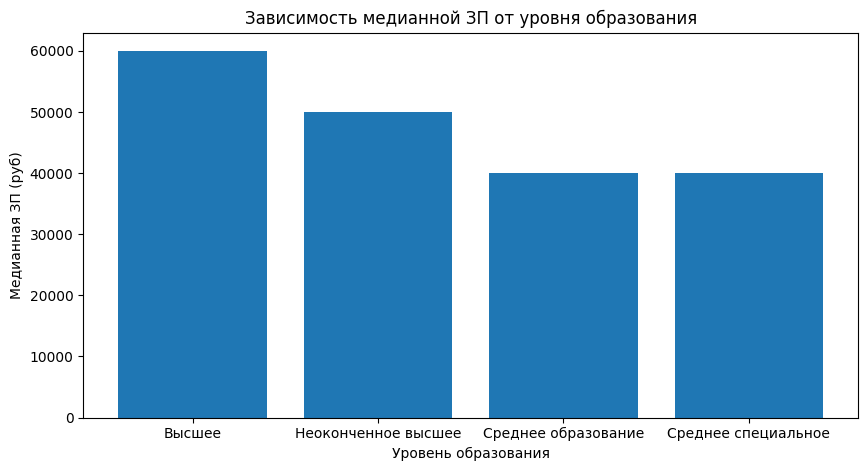

In [30]:
# Применение условия заработная плата меньше 1 млн рублей к выбранным колонкам и расчет медианы
median_salary = hh[['Образование', 'ЗП (руб)']][hh['ЗП (руб)'] < 1000000].groupby('Образование').median().reset_index()

# Построение графика
plt.figure(figsize=(10,5))
plt.bar(median_salary['Образование'], median_salary['ЗП (руб)'])
plt.xlabel('Уровень образования')
plt.ylabel('Медианная ЗП (руб)')
plt.title('Зависимость медианной ЗП от уровня образования')
plt.show()

*ваши* выводы здесь

* для уровней образования Высшее и Неоконченное высшее наблюдаются наибольшие и для уровней образования Среднее и Среднее специальной - наименьшие уровни желаемой заработной платы
* признак уровня образования при прогнозировании заработной платы важен

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

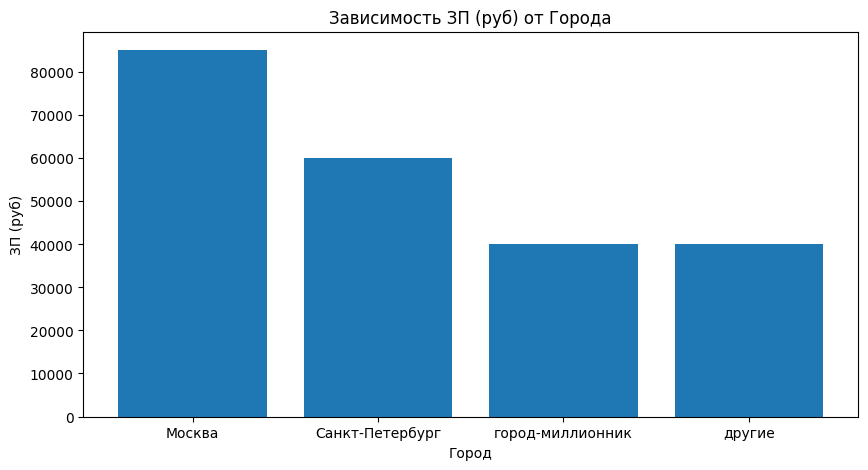

In [31]:
# Применение условия заработная плата меньше 1 млн рублей к выбранным колонкам и расчет медианы
median_salary = hh[['Город', 'ЗП (руб)']][hh['ЗП (руб)'] < 1000000].groupby('Город').median().reset_index()

# Построение графика
plt.figure(figsize=(10,5))
plt.bar(median_salary['Город'], median_salary['ЗП (руб)'])
plt.xlabel('Город')
plt.ylabel('ЗП (руб)')
plt.title('Зависимость ЗП (руб) от Города')
plt.show()

ваши выводы здесь
* медианные уровни желаемой заработной платы и их размах в городах зависят от статуса и размера города
* признак города при прогнозировании заработной платы важен

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

<ipython-input-32-968f06104033>:2: FutureWarning: The provided callable <function median at 0x781738b5b400> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  pivot_df = hh.pivot_table(values='ЗП (руб)', index='Готовность к переезду', columns='Готовность к командировкам', aggfunc=np.median)


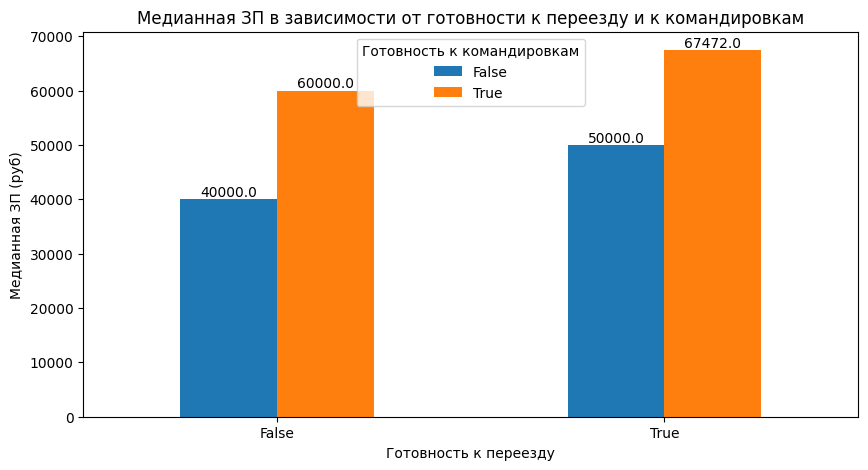

Ответ на Задание 4.6 
Чему равна желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам? 
Ответ приведите в тысячах, округлив до целого (например, 45):
 67


In [32]:
# Группировка данных для создания многоуровневой столбчатой диаграммы
pivot_df = hh.pivot_table(values='ЗП (руб)', index='Готовность к переезду', columns='Готовность к командировкам', aggfunc=np.median)

# Построение многоуровневой столбчатой диаграммы
ax = pivot_df.plot(kind='bar', figsize=(10, 5))

# Добавление меток с максимальными значениями
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('Медианная ЗП в зависимости от готовности к переезду и к командировкам')
plt.xlabel('Готовность к переезду')
plt.ylabel('Медианная ЗП (руб)')
plt.legend(title='Готовность к командировкам', labels=['False', 'True'], loc='upper center')
plt.xticks(rotation=0)
plt.show()

print('Ответ на Задание 4.6 \nЧему равна желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам? \nОтвет приведите в тысячах, округлив до целого (например, 45):\n',
      int(hh.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median().max()['ЗП (руб)']/1000))

ваши выводы здесь
* Заработная плата выше у соискателей готовых к командировкам и ещё выше если соискатель готов к переезду

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

<ipython-input-33-dadfebcd2a08>:2: FutureWarning: The provided callable <function median at 0x781738b5b400> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  pivot_table = hh.pivot_table(values='ЗП (руб)', index='Age', columns='Образование', aggfunc=np.median, fill_value=0)


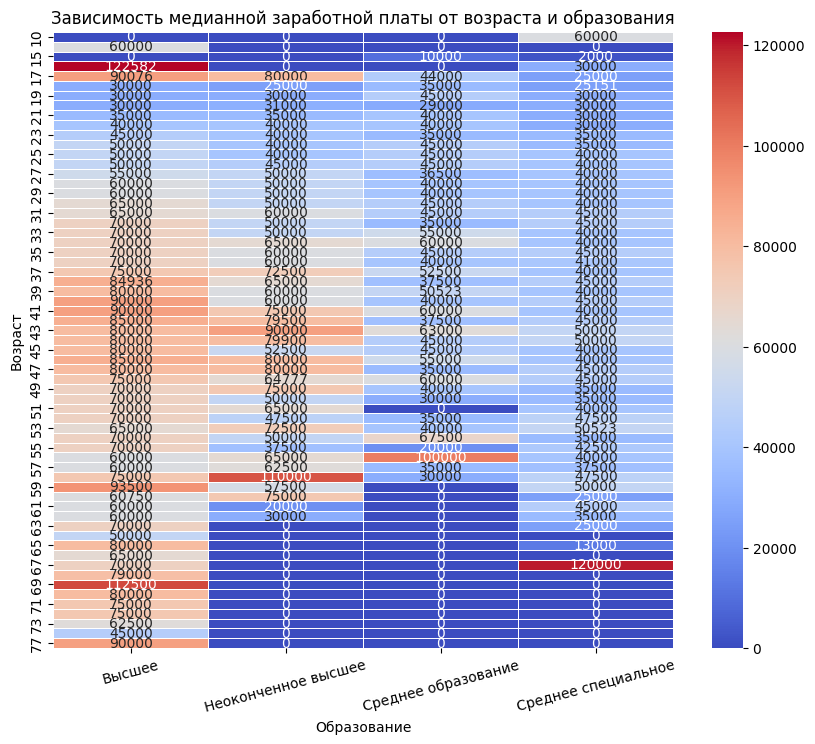

In [33]:
# Создание сводной таблицы
pivot_table = hh.pivot_table(values='ЗП (руб)', index='Age', columns='Образование', aggfunc=np.median, fill_value=0)

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="coolwarm", linewidths=.5)
plt.title('Зависимость медианной заработной платы от возраста и образования')
plt.ylabel('Возраст')
plt.xlabel('Образование')
plt.xticks(rotation=15)
plt.show()

ваши выводы здесь
* Медианнай желаемая заработная плата выше у соискателей с Высшим и неоконченым высшим образованием. Соискатели с Высшим образованием с возрастом старше 60 лет все еще катируются на рынке труда (или продолжают слать резюме)

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

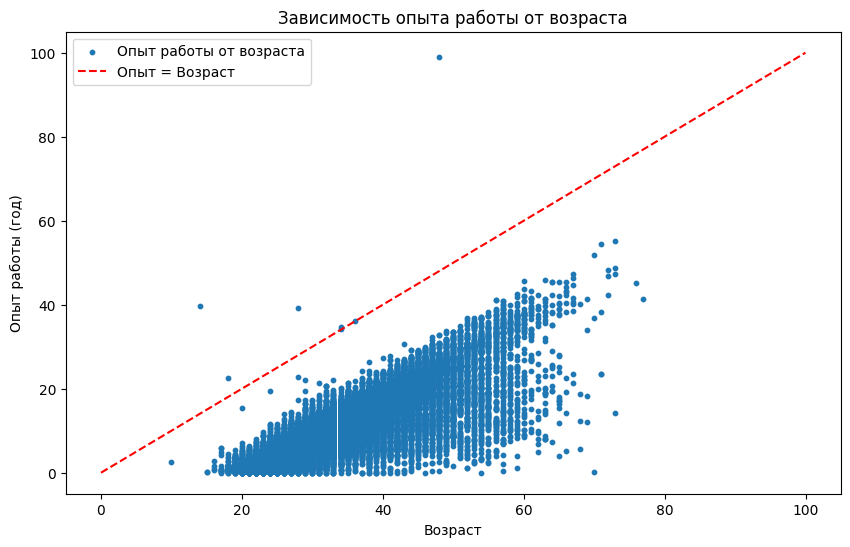

Задание 4.8 Сколько точек лежат строго выше построенной прямой? 7


In [34]:
# Переводим опыт работы из месяцев в года
hh['Опыт работы (год)'] = hh['Опыт работы (месяц)'] / 12

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(hh['Age'], hh['Опыт работы (год)'].fillna(0),s=10,label='Опыт работы от возраста')

# Добавляем прямую, проходящую через точки (0, 0) и (100, 100)
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='Опыт = Возраст')

# Добавляем подписи и легенду
plt.xlabel('Возраст')
plt.ylabel('Опыт работы (год)')
plt.title('Зависимость опыта работы от возраста')
plt.legend()

plt.show()

print('Задание 4.8 Сколько точек лежат строго выше построенной прямой?',
      sum(hh[['Age', 'Опыт работы (год)']].dropna()['Опыт работы (год)'] > hh[['Age', 'Опыт работы (год)']].dropna()['Age']))

ваши выводы здесь
 * после 60 количество желающих работать снижается
 * тенденция накопления опыта выглядит вполне реально

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


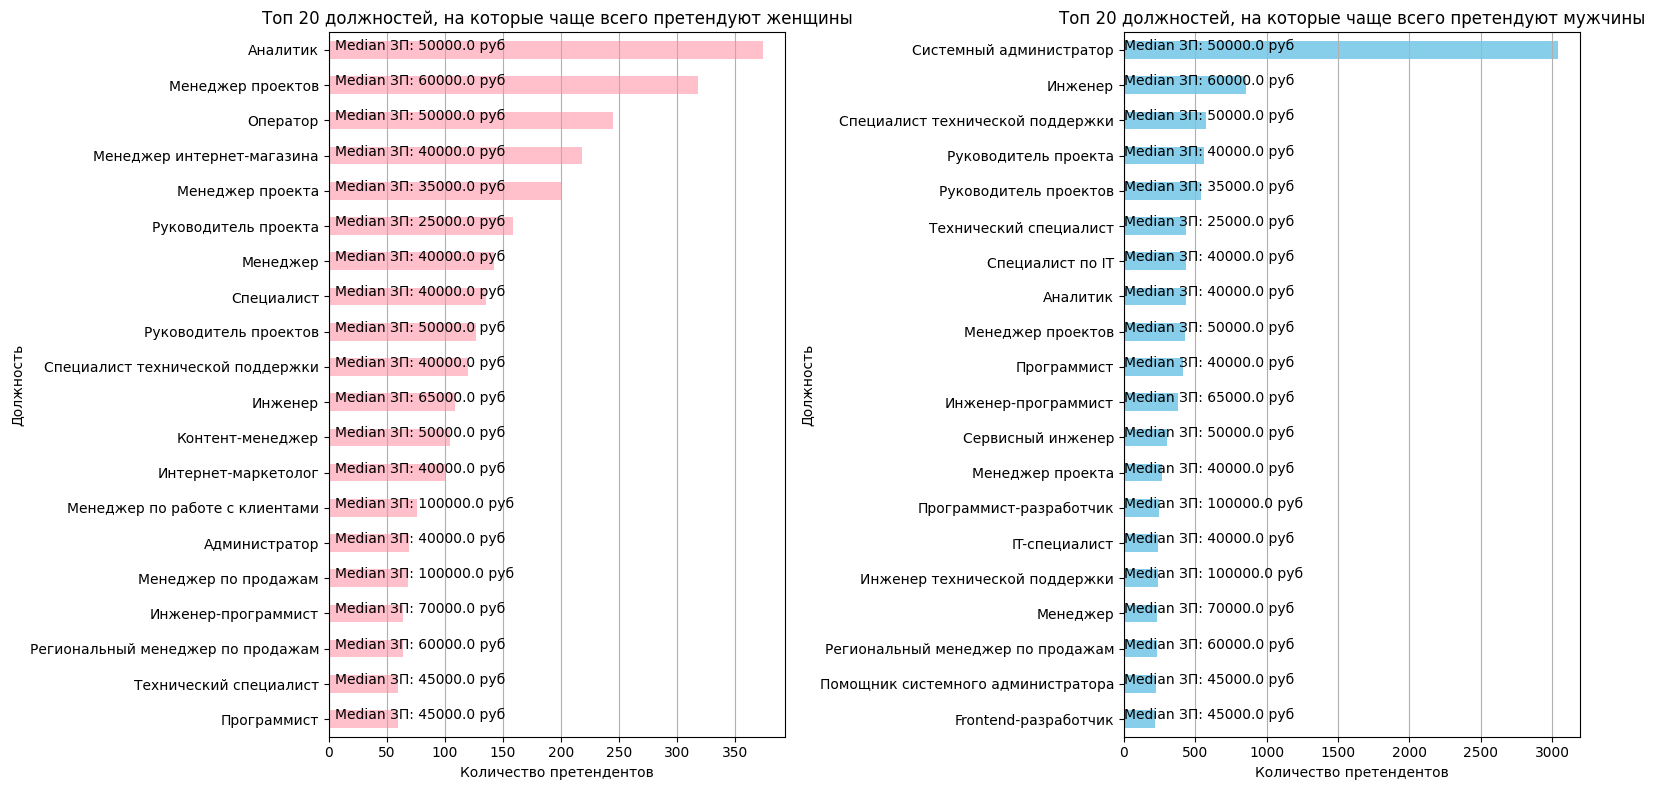

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
# Подсчитываем количество претендентов на каждую должность для женщин
plt.subplot(1, 2, 1)
hh[hh['Sex'] == 'Ж']['Ищет работу на должность:'].value_counts().nlargest(20).iloc[::-1].plot(kind='barh', color='pink')
plt.xlabel('Количество претендентов')
plt.ylabel('Должность')
plt.title('Топ 20 должностей, на которые чаще всего претендуют женщины')
plt.grid(axis='x')

# Вставляем медианные значения 'ЗП (руб)' для каждой должности в топ 20
for idx, val in enumerate(hh['Ищет работу на должность:'].value_counts().nlargest(20).index):
    median_salary = hh[hh['Ищет работу на должность:'] == val]['ЗП (руб)'].median()
    plt.text(5, idx, f'Median ЗП: {median_salary} руб', color='black')

# Подсчитываем количество претендентов на каждую должность для мужчин
plt.subplot(1, 2, 2)
hh[hh['Sex'] == 'М']['Ищет работу на должность:'].value_counts().nlargest(20).iloc[::-1].plot(kind='barh', color='skyblue')
plt.xlabel('Количество претендентов')
plt.ylabel('Должность')
plt.title('Топ 20 должностей, на которые чаще всего претендуют мужчины')
plt.grid(axis='x')

# Вставляем медианные значения 'ЗП (руб)' для каждой должности в топ 20
for idx, val in enumerate(hh['Ищет работу на должность:'].value_counts().nlargest(20).index):
    median_salary = hh[hh['Ищет работу на должность:'] == val]['ЗП (руб)'].median()
    plt.text(5, idx, f'Median ЗП: {median_salary} руб', color='black')

plt.tight_layout()
plt.show()

ваши выводы здесь
 * Топ 20 должностей показывает, где хотят работать мужчины  и женщины и сколько они хотят получать

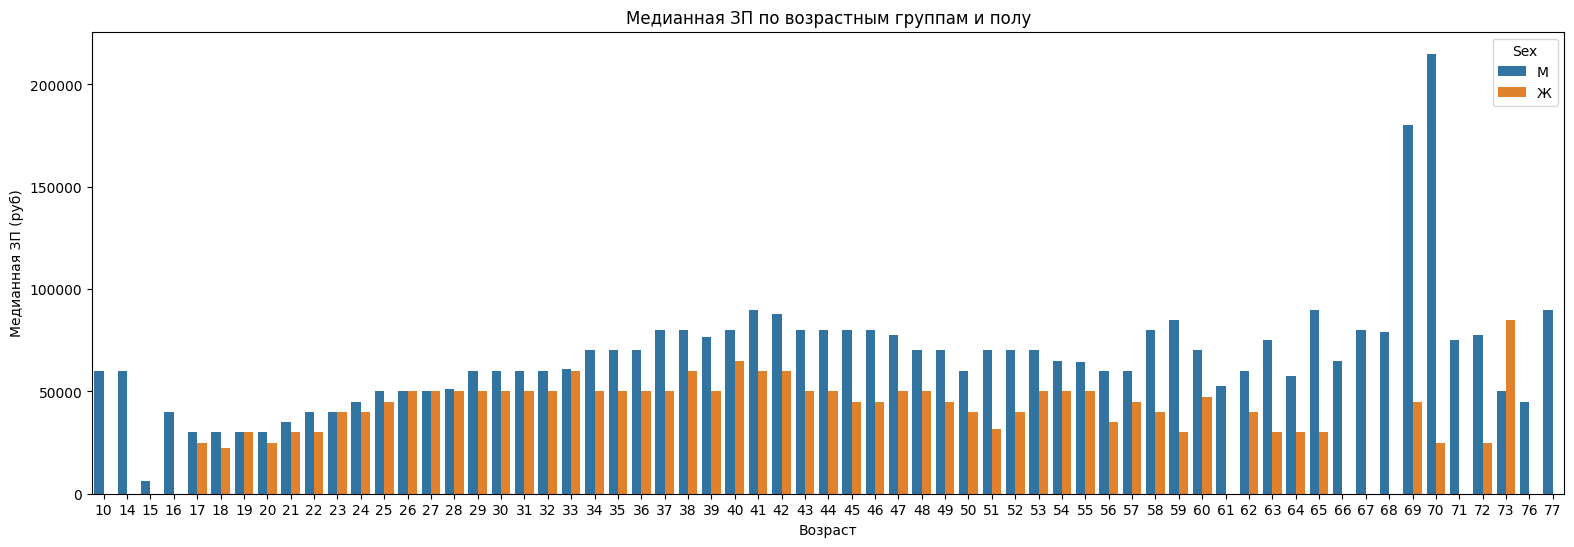

In [36]:
# посмотрим как отличаются ЗП мужчин и женщин по годам
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(19, 6))
sns.barplot(x='Age', y='ЗП (руб)', hue='Sex', data=hh, estimator=np.median, errorbar=None)
plt.title('Медианная ЗП по возрастным группам и полу')
plt.xlabel('Возраст')
plt.ylabel('Медианная ЗП (руб)')
plt.show()

ваши выводы здесь
 * ЗП (руб) мужчин чаще всего больше чем у женщин


# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их.

In [37]:
# но сначала наверное нужно Задание 5.1 выполнить... Сразу напишу, у меня результат 158, но "правильный" ответ 155 либо 161. Это напрягает.
# Вывод информации о количестве дубликатов
print('Количество полных дубликатов в таблице:', hh.duplicated().sum())
# потом удаляем
hh = hh.drop_duplicates()
print('Количество полных дубликатов в таблице после удаления:', hh.duplicated().sum())

Количество полных дубликатов в таблице: 158
Количество полных дубликатов в таблице после удаления: 0


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах.

In [ ]:
# Задание 5.2 Выведите информацию о числе пропусков в столбцах.
# ваш код здесь
print('Задание 5.2 Сколько пропусков в столбце «Опыт работы (месяц)»? ', hh['Опыт работы (месяц)'].isnull().sum())

Задание 5.2 Сколько пропусков в столбце «Опыт работы (месяц)»?  168


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [38]:
# ваш код здесь
# Удаление строк с пропусками в столбцах "Последнее/нынешнее место работы" и "Последняя/нынешняя должность"
hh=hh.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

In [39]:
# Заполнение пропусков в столбце "Опыт работы (месяц)" медианным значением
hh['Опыт работы (месяц)'] = hh['Опыт работы (месяц)'].fillna(hh['Опыт работы (месяц)'].median())

In [40]:
print('Задание 5.3 Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? Ответ округлите до целых:',
int(hh['Опыт работы (месяц)'].mean()))

Задание 5.3 Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? Ответ округлите до целых: 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [41]:
# ваш код здесь
# Удаление строк, в которых указана заработная плата выше 1000000 или ниже 1000
print('Задание 5.4 - Количество выбросов где заработная плата либо выше 1 миллиона рублей, либо ниже 1 тысячи рублей:', hh[(hh['ЗП (руб)'] < 1000) | (hh['ЗП (руб)'] > 1000000)].shape[0] )
# Удаляю выбросы
hh = hh[(hh['ЗП (руб)'] > 1000) & (hh['ЗП (руб)'] < 1000000)]

Задание 5.4 - Количество выбросов где заработная плата либо выше 1 миллиона рублей, либо ниже 1 тысячи рублей: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [42]:
print('Задание 5.5 - резюме, в которых опыт работы в годах превышал возраст соискателя:', len(hh[hh['Опыт работы (месяц)'] / 12 > hh['Age']].index))
hh = hh.drop(hh[hh['Опыт работы (месяц)'] / 12 > hh['Age']].index)

Задание 5.5 - резюме, в которых опыт работы в годах превышал возраст соискателя: 6


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

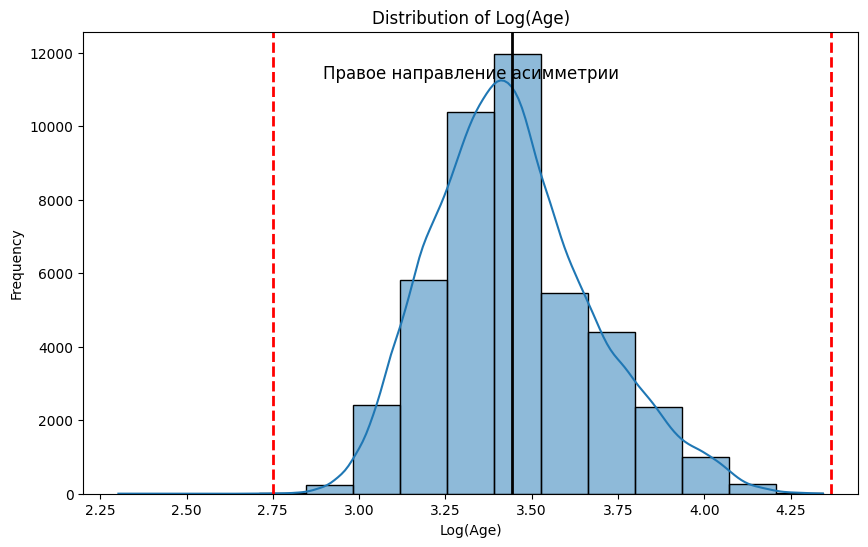

In [43]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Логарифмирование возраста
hh['Log_Age'] = np.log(hh['Age'])

# Построение распределение признака в логарифмическом масштабе
plt.figure(figsize=(10, 6))
histplot = sns.histplot(hh['Log_Age'], bins=15, kde=True)
plt.xlabel('Log(Age)')
plt.ylabel('Frequency')
plt.title('Distribution of Log(Age)')

# Вычисление среднего и границ трех сигм (4 сигмы в правую сторону согласно условию задания)
mean_log = hh['Log_Age'].mean()
std_log = hh['Log_Age'].std()
upper_bound_log = mean_log + 4 * std_log
lower_bound_log = mean_log - 3 * std_log


# Добавление линий среднего и границ трех сигм к графику
histplot.axvline(mean_log, color='k', lw=2, label='Mean')
histplot.axvline(lower_bound_log, color='r', lw=2, linestyle='--', label='Lower Bound (3 Sigma)')
histplot.axvline(upper_bound_log, color='r', lw=2, linestyle='--', label='Upper Bound (3 Sigma)')

# Определение направление асимметрии
if hh['Log_Age'].skew() > 0:
    plt.annotate('Правое направление асимметрии', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, ha='center')
elif hh['Log_Age'].skew() < 0:
    plt.annotate('Левое направление асимметрии', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, ha='center')
else:
    plt.annotate('Симметрия', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, ha='center')
print
plt.show()


In [50]:
# Вычисляю Число выбросов по методу z- отклонения
outliers = hh['Log_Age'][(hh['Log_Age'] < lower_bound_log) | (hh['Log_Age']>upper_bound_log)]
print(f'Число выбросов по методу z- отклонения (логарифмический): {outliers.shape[0]}')

# удалите их из данных, используйте логарифмический масштаб
# hh = hh[~((np.log(hh['Age']) < lower_bound_log) | (np.log(hh['Age']) > upper_bound_log))]

# Вывести Таблицу с полученными выбросами (Но мы их удалили согласно заданию выше) и!!!
# !!! Логарифм не может показывать достоверные результаты
# Для сравнения: логаримфмический
display('Для сравнения: логаримфмический', hh[(hh['Log_Age'] < lower_bound_log) | (hh['Log_Age'] > upper_bound_log)])
# и Не логарифмический - покажет более достоверные данные
display('и Не логарифмический - покажет более достоверные данные', hh[(hh['Age'] < hh.Age.mean() - 3 * hh.Age.std()) | (hh['Age'] > hh.Age.mean() + 4* hh.Age.std())])

# Оцениваю какой возраст попадает в категорию выбросов с учетом послабления
print('Возраст попадающий в категорию z-отклонения', int(hh.Age.mean() - 3 * hh.Age.std()),'и', int(hh.Age.mean() + 4* hh.Age.std()))

Число выбросов по методу z- отклонения (логарифмический): 3


'Для сравнения: логаримфмический'

,Ищет работу на должность:,"Город, переезд, командировки",Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Sex,Age,Опыт работы (месяц),...,стажировка,волонтерство,полный день,гибкий график,сменный график,удаленная работа,вахтовый метод,ЗП (руб),Опыт работы (год),Log_Age
31137,Менеджер по работе с клиентами,"Санкт-Петербург , не готов к переезду , не гот...","ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,06.04.2019 09:13,Не указано,Среднее образование,М,15,2,...,False,False,False,True,True,True,False,10000.0,0.166667,2.70805
32950,Тестировщик игр,"Канск , не готов к переезду , не готов к коман...",OOO ЖМЫХ,Тестировщик ПО,09.04.2019 16:02,Не указано,Среднее специальное,М,15,3,...,False,False,True,False,False,False,False,2000.0,0.25,2.70805
33654,Frontend-разработчик,"Санкт-Петербург , не готов к переезду , готов ...",Freelance,Frontend-разработчик,19.04.2019 23:27,Не указано,Среднее специальное,М,10,30,...,True,False,True,True,False,True,False,60000.0,2.5,2.302585


'и Не логарифмический - покажет более достоверные данные'

,Ищет работу на должность:,"Город, переезд, командировки",Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Sex,Age,Опыт работы (месяц),...,стажировка,волонтерство,полный день,гибкий график,сменный график,удаленная работа,вахтовый метод,ЗП (руб),Опыт работы (год),Log_Age
152,Менеджер по работе с операторами связи,"Талдом , не готова к переезду , не готова к ко...","УралКалий, ОАО",Начальник отдела движения персонала,07.04.2019 09:59,Не указано,Высшее,Ж,72,507,...,False,False,False,False,False,True,False,25000.0,42.25,4.276666
850,"постановщик задач, программист, руководитель I...","Москва , м. Кантемировская , не готов к перее...","ОАО ""ЭКОС""",начальник лаборатории,14.05.2019 17:08,Не указано,Высшее,М,71,281,...,False,False,True,False,False,False,False,100000.0,23.416667,4.26268
1430,Руководитель проекта,"Санкт-Петербург , м. Купчино , готов к переез...",ООО Сталт ЛТД,Руководитель проектов,21.04.2019 16:51,Не указано,Высшее,М,64,421,...,False,False,True,False,False,False,False,80000.0,35.083333,4.158883
2106,Разработчик. мультимедийных проектов. Организа...,"Москва , м. Выхино , не готов к переезду , го...","ООО ""Агентство""",Главный редактор,13.05.2019 10:30,Не указано,Высшее,М,68,482,...,False,False,True,False,False,False,False,38000.0,40.166667,4.219508
3271,Менеджер по продажам / Оператор на телефоне,"Москва , м. Домодедовская , не готов к переез...","ООО ""Гранд Евромебель"" (удаленно)",Менеджер по работе с клиентами,11.05.2019 12:25,Имеется собственный автомобиль,Высшее,М,64,347,...,False,False,False,True,True,True,False,30000.0,28.916667,4.158883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40994,"Программист, разработчик баз данных","Москва , м. Щукинская , не готов к переезду ,...","ООО ""Геотрансинжиниринг""",Вед. специалист Технического отдела,07.09.2018 15:22,Не указано,Высшее,М,64,248,...,False,False,True,False,False,False,False,80000.0,20.666667,4.158883
43381,Программист Navision,"Москва , м. Славянский бульвар , не готов к п...",ООО ПРОФФИ-Стиль,Программист-разработчик,26.04.2019 11:54,Не указано,Высшее,М,68,224,...,False,False,True,True,False,True,False,120000.0,18.666667,4.219508
44363,Эксперт (специалист) по информационной безопас...,"Москва , м. Планерная , не готов к переезду ,...","ООО ""КАБЕСТ"", Группа компаний ""Астерос""","Директор департамента, Руководитель службы Гла...",26.04.2019 15:40,Не указано,Высшее,М,70,622,...,False,False,True,False,False,False,False,350000.0,51.833333,4.248495
44414,Инженер-электронщик Работы на дому у себя.,"Челябинск , не готов к переезду , не готов к к...",Ч.П.,Инженер-конструктор-электронщик,08.04.2019 12:29,Не указано,Высшее,М,65,545,...,True,True,False,True,False,True,False,25000.0,45.416667,4.174387


Возраст попадающий в категорию z-отклонения 8 и 63


63.84362718131571


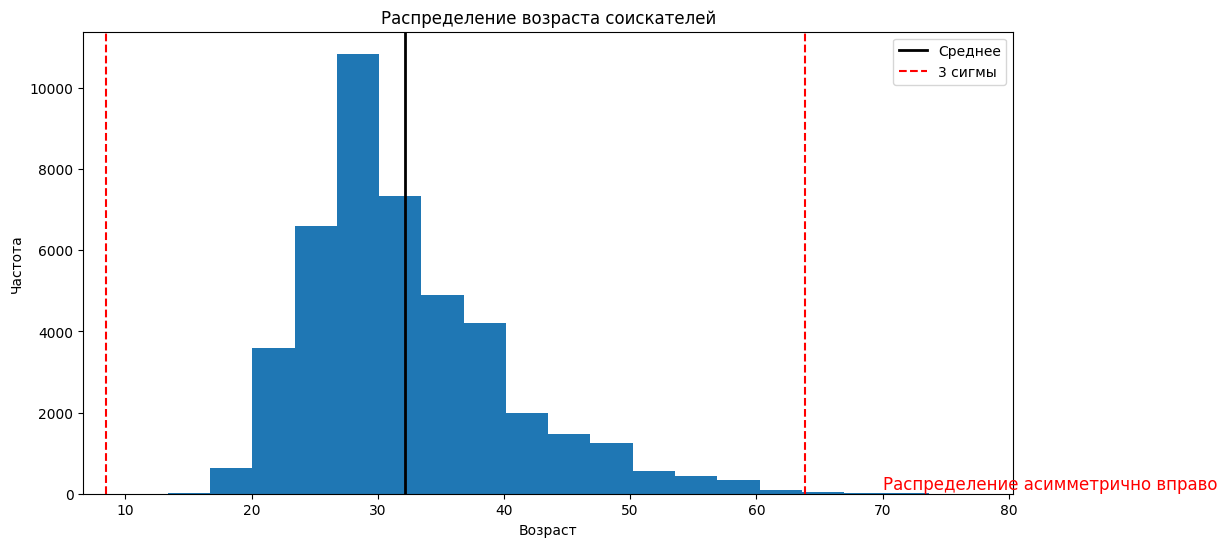

Выбросы по возрасту: 64 - 77


In [51]:
# P.S. Нагляднее изобразить график с реальным возрастом
# Построение распределения признака "Возраст" в реальных значениях
plt.figure(figsize=(12, 6))
plt.hist(hh['Age'], bins=20)
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возраста соискателей')

# Добавление линий среднего и границ интервала метода трех сигм
mean_age = hh['Age'].mean()
std_age = hh['Age'].std()
plt.axvline(mean_age, color='k', lw=2, label='Среднее')
# Послабление до 4 сигм
plt.axvline(mean_age + 4*std_age, color='r', linestyle='--', label='3 сигмы')
plt.axvline(mean_age - 3*std_age, color='r', linestyle='--')
plt.legend()
print(mean_age + 4*std_age)

# Комментарий к графику: распределение асимметрично вправо
plt.text(70, 100, 'Распределение асимметрично вправо', fontsize=12, color='red')

# Нахождение и удаление выбросов с помощью z-отклонения (усиленного до 4 сигм)
outliers = hh[(hh['Age'] - mean_age).abs() > 4*std_age]['Age']
cleaned_data = hh[~hh['Age'].isin(outliers)]

plt.show()

# Вывод таблицы с полученными выбросами
print("Выбросы по возрасту:", list(set(outliers))[0],'-', list(set(outliers))[-1])

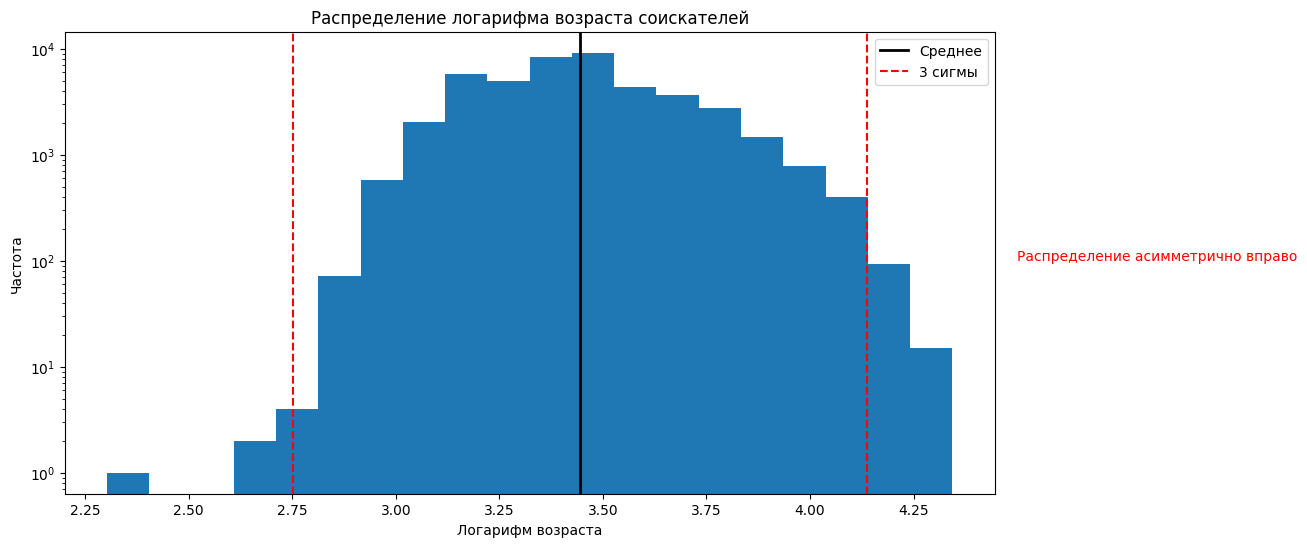

Выбросы по возрасту:


,Age
33654,10


In [47]:
# И решение согласно заданию

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Построение распределения признака "Возраст" в логарифмическом масштабе
plt.figure(figsize=(12, 6))
log_age = np.log(hh['Age'])
plt.hist(log_age, bins=20)
plt.yscale('log')
plt.xlabel('Логарифм возраста')
plt.ylabel('Частота')
plt.title('Распределение логарифма возраста соискателей')

# Добавление линий среднего и границ интервала метода трех сигм
mean_age = log_age.mean()
std_age = log_age.std()
plt.axvline(mean_age, color='k', lw=2, label='Среднее')
plt.axvline(mean_age + 3*std_age, color='r', linestyle='--', label='3 сигмы')
plt.axvline(mean_age - 3*std_age, color='r', linestyle='--')
plt.legend()

# логарифмическое распределение асимметрично вправо
plt.text(4.5, 100, 'Распределение асимметрично вправо', fontsize=10, color='red')

# Нахождение и удаление выбросов с помощью z-отклонения (4 сигмы)
outliers = log_age[(log_age - mean_age).abs() > 4*std_age]
cleaned_data = hh.drop(outliers.index)

plt.show()

# Вывод таблицы с полученными выбросами
print("Выбросы по возрасту:")
display(hh.loc[outliers.index, 'Age'])

ваш коммментарий здесь

* Использование логарифмического метода в данном задании отдаляет от получения достоверного результата.
* Рекомендую использовать реальные данные для получения наглядного и достоверного результата

In [ ]:
# Хвост, можно не читать )

In [ ]:
# Преобразование даты и времени в столбце 'Обновление резюме' заранее
hh['Обновление резюме'] = pd.to_datetime(hh['Обновление резюме'], format='%d.%m.%Y %H:%M').dt.strftime('%d/%m/%y')

def convert_salary(row):
    salary, currency = row['ЗП'].split()
    salary = int(salary)
    currency = currency.rstrip('.').upper()

    if currency == 'РУБ':
        return pd.Series([salary, None, None, currency])

    if currency == 'БЕЛ.РУБ':
        currency = 'BYN'

    date = row['Обновление резюме']
    exchange_rate_row = hhe.loc[(hhe['date'] == date) & (hhe['currency'].str.upper() == currency)]

    if not exchange_rate_row.empty:
        return pd.Series([salary * exchange_rate_row['close'].iloc[0] / exchange_rate_row['proportion'].iloc[0], exchange_rate_row['close'].iloc[0], exchange_rate_row['proportion'].iloc[0], currency])
    else:
        return pd.Series([None, currency, None, None])

hh[['ЗП руб.', 'currency', 'close' , 'proportion']] = hh.apply(convert_salary, axis=1)
hh[~hh['ЗП'].str.contains(' руб')]


In [ ]:
hhdate = pd.to_datetime(hh['Обновление резюме'], format='%d.%m.%Y %H:%M').dt.strftime('%d/%m/%Y')
hhedate = pd.to_datetime(hhe['date'], format='%d/%m/%y').dt.strftime('%d/%m/%Y')

In [ ]:
print(set([i.split()[1].upper() for i in hh['ЗП'] if i !='руб.']))

{'БЕЛ.РУБ.', 'KGS', 'EUR', 'KZT', 'AZN', 'ГРН.', 'СУМ', 'USD'}


In [ ]:
# Convert 'Обновление резюме' to datetime and remove the time for correct matching
hh['Обновление резюме'] = pd.to_datetime(hh['Обновление резюме'], format='%d.%m.%Y %H:%M').dt.date

# Split 'ЗП' into salary and currency
hh[['salary', 'currency']] = hh['ЗП'].str.split().apply(pd.Series)
hh['salary'] = hh['salary'].astype(int)
hh['currency'] = hh['currency'].str.rstrip('.').str.upper()

# Replace 'БЕЛ.РУБ' with 'BYN'
hh['currency'] = hh['currency'].replace('БЕЛ.РУБ', 'BYN')

# Define conversion function
def convert_salary(row):
    hhdate = row['Обновление резюме']
    salary = row['salary']
    currency = row['currency']

    if currency == 'РУБ': return pd.Series([salary, currency, None])
    else:
        exchange_rate_row = hhe.loc[(hhe['date'] == hhdate) & (hhe['currency'].str.upper() == currency)]
        if not exchange_rate_row.empty:
            return pd.Series([salary * exchange_rate_row['close'].iloc[0] / exchange_rate_row['proportion'].iloc[0], currency, exchange_rate_row['proportion'].iloc[0]])
        else:
            return pd.Series([None, currency, None])

# Apply conversion function
hh[['ЗП руб.', 'currency', 'proportion']] = hh.apply(convert_salary, axis=1)

# Filter out rows where currency is 'РУБ'
hh = hh[hh['currency'] != 'РУБ']

hh

In [ ]:
def convert_salary(row):
    salary = int(row['ЗП'].split()[0])
    currency = row['ЗП'].split()[1].rstrip('.').upper()

    if currency == 'БЕЛ.РУБ':
        currency = 'BYN'

    if currency == 'РУБ': return pd.Series([salary, None, None, currency])
    else:
        date = pd.to_datetime(row['Обновление резюме'], format='%d.%m.%Y %H:%M').date()
        formatted_date = date.strftime('%d/%m/%y')
        exchange_rate_row = hhe.loc[(hhe['date'] == formatted_date) & (hhe['currency'].str.upper() == currency)]

        if not exchange_rate_row.empty:
          return pd.Series([salary * exchange_rate_row['close'].iloc[0] / exchange_rate_row['proportion'].iloc[0], exchange_rate_row['close'].iloc[0], exchange_rate_row['proportion'].iloc[0], currency])
        else:
            return pd.Series([None, currency, None, None])

hh[['ЗП руб.', 'currency', 'close' , 'proportion']] = hh.apply(convert_salary, axis=1)
hh[~hh['ЗП'].str.contains(' руб')]
# hh.drop(["currency"], axis=1).info()
# hh.drop(["close"], axis=1).info()
# hh.drop(["proportion"], axis=1).info()

In [ ]:
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!# Convert 'Обновление резюме' to datetime and remove the time for correct matching
hh['Обновление резюме'] = pd.to_datetime(hh['Обновление резюме'], format='%d.%m.%Y %H:%M').dt.date
def convert_salary(row):
    hhdate = row['Обновление резюме']
    salary, currency = row['ЗП'].split()
    salary = int(salary)
    currency = currency.rstrip('.').upper()

    if currency == 'БЕЛ.РУБ':
        currency = 'BYN'  # replace 'бел.руб.' with 'BYN'

    if currency == 'РУБ': return pd.Series([salary, currency, None])
    else:
        exchange_rate_row = hhe.loc[(hhe['date'] == hhdate) & (hhe['currency'].str.upper() == currency)]
        if not exchange_rate_row.empty:
            return pd.Series([salary * exchange_rate_row['close'].values[0] / exchange_rate_row['proportion'].values[0], currency, exchange_rate_row['proportion'].values[0]])
        else:
            return pd.Series([None, currency, None])

hh[['ЗП руб.', 'currency', 'proportion']] = hh.apply(convert_salary, axis=1)
hh = hh[hh['currency'] != 'РУБ']
hh
# hh.drop(["currency"], axis=1).info()
# hh.drop(["currency"], axis=1).info()

In [ ]:
# Приведем столбец 'Обновление резюме' в DataFrame hh к типу datetime
hh['Обновление резюме'] = pd.to_datetime(hh['Обновление резюме'], format='%d.%m.%Y %H:%M')

# Приведем столбец 'date' в DataFrame hhe к типу datetime
hhe['date'] = pd.to_datetime(hhe['date'], format='%d/%m/%y')

# Функция для поиска соответствующего курса валюты по дате
def find_exchange_rate(row):
    if 'руб.' in row['ЗП']:
        return float(row['ЗП'].split()[0])
    else:
        currency = row['ЗП'].split()[1].rstrip('.').upper()
        date = row['Обновление резюме'].date()
        exchange_rate_row = hhe[(hhe['date'] == date) & (hhe['currency'].str.upper() == currency)]
        if not exchange_rate_row.empty:
            proportion = exchange_rate_row['proportion'].iloc[0]
            return exchange_rate_row['close'].iloc[0] * float(row['ЗП'].split()[0]) * proportion

# Применяем функцию к каждой строке DataFrame
hh['ЗП (руб)'] = hh.apply(find_exchange_rate, axis=1).astype('Int32')

# Выводим результат
print(hh['ЗП (руб)'])


In [ ]:
# Приведем столбец 'Обновление резюме' в DataFrame hh к типу datetime
hh['Обновление резюме'] = pd.to_datetime(hh['Обновление резюме'], format='%d.%m.%Y %H:%M')

# Приведем столбец 'date' в DataFrame hhe к типу datetime
hhe['date'] = pd.to_datetime(hhe['date'], format='%d/%m/%y')

# Функция для поиска соответствующего курса валюты по дате
def find_exchange_rate(row):
    if 'руб.' in row['ЗП']:
        return float(row['ЗП'].split()[0])
    else:
        exchange_rate_row = hhe[(hhe['date'] == row['Обновление резюме'].date()) & (hhe['currency'].str.upper() == row['ЗП'].split()[1].rstrip('.').upper())]
        if not exchange_rate_row.empty:
            return exchange_rate_row['close'].iloc[0] * float(row['ЗП'].split()[0]) * exchange_rate_row['proportion'].iloc[0]

# Применяем функцию к каждой строке DataFrame
hh['ЗП (руб)'] = hh.apply(find_exchange_rate, axis=1).astype('Int32')

# Выводим результат
print(hh['ЗП (руб)'])


0         29000
1         40000
2         20000
3        100000
4        140000
          ...  
44739     50000
44740     39000
44741     40000
44742     20000
44743    120000
Name: ЗП (руб), Length: 44744, dtype: Int32


In [ ]:
print(hhe).head(11)

In [ ]:
# Приведем столбец 'Обновление резюме' в DataFrame hh к типу datetime
hh['Обновление резюме'] = pd.to_datetime(hh['Обновление резюме'], format='%d.%m.%Y %H:%M')

# Приведем столбец 'date' в DataFrame hhe к типу datetime
hhe['date'] = pd.to_datetime(hhe['date'], format='%d/%m/%y')

# Функция для поиска соответствующего курса валюты по дате
def find_exchange_rate(row):
    if 'руб.' in row['ЗП']:
        return float(row['ЗП'].split()[0])
    else:
        currency = row['ЗП'].split()[1].rstrip('.').upper()
        exchange_rate_row = hhe[(hhe['date'] == row['Обновление резюме'].date()) & (hhe['currency'].str.upper() == currency)]
        if not exchange_rate_row.empty:
            return exchange_rate_row['close'].iloc[0] * float(row['ЗП'].split()[0])

# Применяем функцию к каждой строке DataFrame
hh['ЗП (руб)'] = hh.apply(find_exchange_rate, axis=1).astype('Int32')

# Выводим результат
print(hh['ЗП (руб)'])




In [ ]:
# Функция для поиска соответствующего курса валюты по дате
def find_exchange_rate(row):
    if 'руб.' in row['ЗП']:
        return row['ЗП'].split()[0]
    else:
        date = row['Обновление резюме'].strftime('%d/%m/%Y')
        currency = row['ЗП'].split()[1].rstrip('.').upper()

        exchange_rate_row = hhe[(hhe['date'] == row['Обновление резюме'].date()) & (hhe['currency'].str.upper() == currency)]
        print(hhe['date'], row['Обновление резюме'].date())
        if not exchange_rate_row.empty:
            return exchange_rate_row['close'].iloc[0] * int(row['ЗП'].split()[0])

# Применяем функцию к каждой строке DataFrame
hh['ЗП (руб)'] = hh.apply(find_exchange_rate, axis=1).astype('Int32')

# Выводим результат
print(hh['ЗП (руб)'])

In [ ]:
import pandas as pd


# Приведем даты в hh['Обновление резюме'] к общему формату
hh['Обновление резюме'] = pd.to_datetime(hh['Обновление резюме'], format='%d.%m.%Y %H:%M')

# Функция для поиска соответствующего курса валюты по дате
def find_exchange_rate(row):
    if 'руб.' in row['ЗП']:
        return row['ЗП'].split()[0]
    else:
        date = row['Обновление резюме'].strftime('%d/%m/%Y')
        currency = row['ЗП'].split()[1].upper().rstrip('.')
        exchange_rate_row = hhe[(hhe['date'] == date) & (hhe['currency'].str.upper() == currency)]
        print(hhe['date'])
        if not exchange_rate_row.empty:
            return exchange_rate_row['close'].iloc[0] * int(row['ЗП'].split()[0])

# Применяем функцию к каждой строке DataFrame
hh['ЗП (руб)'] = hh.apply(find_exchange_rate, axis=1).astype('Int32')

# Выводим результат
print(hh['ЗП (руб)'])

In [ ]:
import pandas as pd

# Приведем даты в hh['Обновление резюме'] к общему формату
hh['Обновление резюме'] = pd.to_datetime(hh['Обновление резюме'], format='%d.%m.%Y %H:%M')

# Проверяем наличие "руб." в столбце "ЗП"
hh['ЗП (руб)'] = hh['ЗП'].apply(lambda x: float(x.split()[0]) if 'руб.' in x else None)

# Преобразуем значения в столбце "ЗП (руб)" к числовому формату
hh['ЗП (руб)'] = pd.to_numeric(hh['ЗП (руб)'], errors='coerce')

# Функция для поиска соответствующего курса валюты по дате
def find_exchange_rate(row):
    if pd.isnull(row['ЗП (руб)']):  # Если в столбце "ЗП (руб)" значение NaN
        date = row['Обновление резюме'].strftime('%d/%m/%Y')  # Преобразуем дату в нужный формат
        currency = row['ЗП'].split()[1]  # Получаем валюту из столбца "ЗП"
        exchange_rate_row = hhe[(hhe['date'] == date) & (hhe['currency'] == currency)]  # Выполняем поиск по дате и валюте
        if not exchange_rate_row.empty:  # Если результат поиска не пустой
            return exchange_rate_row['close'].iloc[0] * float(row['ЗП'].split()[0])  # Вычисляем ЗП в рублях
    return row['ЗП (руб)']  # Возвращаем изначальное значение из столбца "ЗП (руб)"

# Применяем функцию к каждой строке DataFrame
hh['ЗП (руб)'] = hh.apply(find_exchange_rate, axis=1)

# Выводим результат
print(hh['ЗП (руб)'])

0         29000.0
1         40000.0
2         20000.0
3        100000.0
4        140000.0
           ...   
44739     50000.0
44740     39000.0
44741     40000.0
44742     20000.0
44743    120000.0
Name: ЗП (руб), Length: 44744, dtype: float64


In [ ]:
# Можно не смотреть - черновик для проверки, создавал доп столбцы
#Вариация# и не менял входящую базу валют, но дольше значительно

def convert_salary(row):
    salary = int(row['ЗП'].split()[0])
    currency = row['ЗП'].split()[1].rstrip('.').upper()

    if currency == 'БЕЛ.РУБ':
        currency = 'BYN'

    if currency == 'РУБ': return pd.Series(salary)
    else:
        date = pd.to_datetime(row['Обновление резюме'], format='%d.%m.%Y %H:%M').date()
        formatted_date = date.strftime('%d/%m/%y')
        exchange_rate_row = hhe.loc[(hhe['date'] == formatted_date) & (hhe['currency'].str.upper() == currency)]

        if not exchange_rate_row.empty:
          return pd.Series((salary * exchange_rate_row['close'].iloc[0] / exchange_rate_row['proportion'].iloc[0]).round(2))
          # return pd.Series([(salary * exchange_rate_row['close'].iloc[0] / exchange_rate_row['proportion'].iloc[0]).round(2), exchange_rate_row['close'].iloc[0], exchange_rate_row['proportion'].iloc[0], currency])
        else:
            return pd.Series(None)

hh['ЗП (руб)'] = hh.apply(convert_salary, axis=1)
# hh[['ЗП (руб)', 'close', 'proportion', 'currency' ]] = hh.apply(convert_salary, axis=1)
hh[~hh['ЗП'].str.contains(' руб')]
# hh.drop(["currency"], axis=1).info()
# hh.drop(["close"], axis=1).info()
# hh.drop(["proportion"], axis=1).info()
# del hh['proportion']
# del hh['currency']
# del hh['close']
# я не конвертирую в нужный формат hhe т.к. не знаю, можно ли вносить изменения...
# hh[~hh['ЗП'].str.contains(' руб')]